In [ ]:
!pip install kmodes

In [ ]:
!pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.7/dist-packages (0.11.0)


In [ ]:
import pandas as pd
import numpy as np


**Loading and Preprocessing the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/for-clustering-users.xlsx", index_col=0)

In [ ]:
df.head(5)

,name,screen_name,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question20,question21,question22,question23,question24,question25,question26,question27,question28,question29,question30,question31,question32,question33,question34,question35,question36,question37,question38,question39,question40,question41,Latitude,Longitude,translated,topics,Preferred_archetype
0,Guadalupee,123ilSE,0,1,0,0,1,0.147083,0.211042,0.168833,0.150292,0.187042,0.044171,0.020499,0.875858,0.003289,0.047788,0.008394,0.6721,Right,Student Loan,"Not at all, i’d rather rent all assets.",Another benefit,Yearly a few times,Less then 1 hour,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Every two weeks,Two to Three Times a Week,Every Year,Banking & Financial Services,I don't have a car,Netherlands,3 - 4 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, levi's, vans",I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Hockey,Hiking,Unemployed,36423,Female,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,1399,Prolific Participant,"English, Dutch, German",Operations,"AirBnB, Walt Disney, Duracell, Virgin, Red Bul...",None,"Books, Clothing & Shoes, Health & Beauty","Instagram, Youtube, Whatsapp","Print (Newspapers & Periodicals), Radio (AM/FM...",52.3246,5.119300,first time on twitter how doess this work lost,"['low', 'origin', 'film', 'paddy', 'seinfuckin...",Leave legacy
1,4M,4MCrypto,2248,122,457,3,1246,0.129500,0.221500,0.143000,0.189500,0.182500,0.035848,0.001670,0.780312,0.001635,0.025637,0.154898,0.9586,Right,Student Loan,"Yes, but in some cases I would consider rental...",A paid job,Every day,1 to 2 hours,Once a Week,3 hours or more,3 hours or more,Less then 1 hour,Monthly,Once a Week,Every Few Years,"Retail, Wholesale & Distribution",I don't have a car,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, two thirds, salomon",I don't drive or have a car,"C, I respond to the content available online,...","Healthcare Insurance, Home Owners Insurance, R...",Swimming,Swimming,Employed part time (1-34 hours per week),34454,Male,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,2611AN,Prolific Participant,"English, Dutch","Marketing, Sales & Business Development","Unicef, Lego, Volvo, IBM, Apple, Porsche","Savings Account, Stock Options","Electronics & Computers, Handmade Products, Sp...","Facebook, Instagram, Twitter","Online News (News Websites, News Apps), Print ...",52.0117,4.359700,free aletop goon x buy approaching signal on h...,"['water', 'sleep', 'solo', 'bah', 'steam', 'fi...",Provide structure
2,Arun Joseph,acid_milkshake,1834,43,276,0,327,0.113000,0.211500,0.068000,0.126500,0.142000,0.457770,0.130685,0.336976,0.007447,0.054606,0.012515,0.7403,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,Every day,1 to 2 hours,Two to Three Times a Week,3 hours or more,3 hours or more,1 to 2 hours,Three days a week,Two to Three Times a Week,Every Year,Software & IT Services,I don't have a car,India,3 - 4 persons,"No, not necessarily, i don't feel that committ...",Smartphone or Tablet,"Tesla, Google, Asus",I don't drive or have a car,"D, I am eager for information and absorb artic...",Life Insurance,Soccer,Cooking,Independent part time (1-34 hours per week),36758,Male,Some college (no degree) Associate's degree,Less then 20.000 EUR,Single,India,560066,Odema Community Member,"English, German",Information Technology,"Unicef, Lego, Volvo, IBM, Apple, Porsche",Mutual Funds,"Books, Clothing & Shoes, Electronics & Compute...","Instagram, Twitter, Linkedin, Youtube, Whatsapp","Online

In [ ]:
df.drop(['name','screen_name', 'question20', 'question33', 'translated'], axis=1, inplace=True)
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df.head()


Dimension data: 161 rows and 60 columns


,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question21,question22,question23,question24,question25,question26,question27,question28,question29,question30,question31,question32,question34,question35,question36,question37,question38,question39,question40,question41,Latitude,Longitude,topics,Preferred_archetype
0,0,1,0,0,1,0.147083,0.211042,0.168833,0.150292,0.187042,0.044171,0.020499,0.875858,0.003289,0.047788,0.008394,0.6721,Right,Student Loan,"Not at all, i’d rather rent all assets.",Another benefit,Yearly a few times,Less then 1 hour,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Every two weeks,Two to Three Times a Week,Every Year,Banking & Financial Services,I don't have a car,Netherlands,3 - 4 persons,"Maybe, it depends if nothing betters comes up",Desktop,I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Hockey,Hiking,Unemployed,36423,Female,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,Prolific Participant,"English, Dutch, German",Operations,"AirBnB, Walt Disney, Duracell, Virgin, Red Bul...",None,"Books, Clothing & Shoes, Health & Beauty","Instagram, Youtube, Whatsapp","Print (Newspapers & Periodicals), Radio (AM/FM...",52.3246,5.119300,"['low', 'origin', 'film', 'paddy', 'seinfuckin...",Leave legacy
1,2248,122,457,3,1246,0.129500,0.221500,0.143000,0.189500,0.182500,0.035848,0.001670,0.780312,0.001635,0.025637,0.154898,0.9586,Right,Student Loan,"Yes, but in some cases I would consider rental...",A paid job,Every day,1 to 2 hours,Once a Week,3 hours or more,3 hours or more,Less then 1 hour,Monthly,Once a Week,Every Few Years,"Retail, Wholesale & Distribution",I don't have a car,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Desktop,I don't drive or have a car,"C, I respond to the content available online,...","Healthcare Insurance, Home Owners Insurance, R...",Swimming,Swimming,Employed part time (1-34 hours per week),34454,Male,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,Prolific Participant,"English, Dutch","Marketing, Sales & Business Development","Unicef, Lego, Volvo, IBM, Apple, Porsche","Savings Account, Stock Options","Electronics & Computers, Handmade Products, Sp...","Facebook, Instagram, Twitter","Online News (News Websites, News Apps), Print ...",52.0117,4.359700,"['water', 'sleep', 'solo', 'bah', 'steam', 'fi...",Provide structure
2,1834,43,276,0,327,0.113000,0.211500,0.068000,0.126500,0.142000,0.457770,0.130685,0.336976,0.007447,0.054606,0.012515,0.7403,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,Every day,1 to 2 hours,Two to Three Times a Week,3 hours or more,3 hours or more,1 to 2 hours,Three days a week,Two to Three Times a Week,Every Year,Software & IT Services,I don't have a car,India,3 - 4 persons,"No, not necessarily, i don't feel that committ...",Smartphone or Tablet,I don't drive or have a car,"D, I am eager for information and absorb artic...",Life Insurance,Soccer,Cooking,Independent part time (1-34 hours per week),36758,Male,Some college (no degree) Associate's degree,Less then 20.000 EUR,Single,India,Odema Community Member,"English, German",Information Technology,"Unicef, Lego, Volvo, IBM, Apple, Porsche",Mutual Funds,"Books, Clothing & Shoes, Electronics & Compute...","Instagram, Twitter, Linkedin, Youtube, Whatsapp","Online News (News Websites, News Apps), Podcas...",13.2257,77.661150,"['police', 'nigeria', 'european', 'shoot', 'ou...",Provide structure
3,0,2,0,0,7,0.152750,0.250750,0.101250,0.146250,0.166500,0.187408,0.067470,0.671730,0.007165,0.053518,0.012708,0.6229,Right,Auto Loans,"Not at all, i’d rather rent al

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   favourites_count     161 non-null    int64  
 1   followers_count      161 non-null    int64  
 2   friends_count        161 non-null    int64  
 3   listed_count         161 non-null    int64  
 4   statuses_count       161 non-null    int64  
 5   Agreeableness        161 non-null    float64
 6   Openness             161 non-null    float64
 7   Neuroticism          161 non-null    float64
 8   Extraversion         161 non-null    float64
 9   Conscientiousness    161 non-null    float64
 10  Angry                161 non-null    float64
 11  Fear                 161 non-null    float64
 12  Joy                  161 non-null    float64
 13  Surprise             161 non-null    float64
 14  Sadness              161 non-null    float64
 15  Love                 161 non-null    flo

In [ ]:
df.dtypes

favourites_count         int64
followers_count          int64
friends_count            int64
listed_count             int64
statuses_count           int64
Agreeableness          float64
Openness               float64
Neuroticism            float64
Extraversion           float64
Conscientiousness      float64
Angry                  float64
Fear                   float64
Joy                    float64
Surprise               float64
Sadness                float64
Love                   float64
sentiment              float64
question1               object
question2               object
question3               object
question4               object
question5               object
question6               object
question7               object
question8               object
question9               object
question10              object
question11              object
question12              object
question13              object
question14              object
question15              object
question

In [ ]:
df.isna().sum()

favourites_count       0
followers_count        0
friends_count          0
listed_count           0
statuses_count         0
Agreeableness          0
Openness               0
Neuroticism            0
Extraversion           0
Conscientiousness      0
Angry                  0
Fear                   0
Joy                    0
Surprise               0
Sadness                0
Love                   0
sentiment              0
question1              0
question2              0
question3              0
question4              0
question5              0
question6              0
question7              0
question8              0
question9              0
question10             0
question11             0
question12             0
question13             0
question14             0
question15             0
question16             0
question17             0
question18             0
question19             0
question21             0
question22             0
question23             0
question24             0


In [ ]:
df.tail(2)

,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question21,question22,question23,question24,question25,question26,question27,question28,question29,question30,question31,question32,question34,question35,question36,question37,question38,question39,question40,question41,Latitude,Longitude,topics,Preferred_archetype
159,1698,198,120,0,379,0.131592,0.225433,0.161308,0.184767,0.178492,0.039814,0.010619,0.915958,0.003785,0.018278,0.011545,0.0,Right,"Credit Cards, Student Loan","Yes, but in some cases I would consider rental...",A paid job,Monthly,2 to 3 hours,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Monthly,Not at All,Every Year,Healthcare,I don't have a car,Netherlands,2 persons,"Yes, because it really understripes who I am a...",Laptop,I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Swimming,Drawing,Employed full time (35+ hours per week),33981,Female,Master's degree,20.000 EUR to 50.000 EUR,Single,Netherlands,Prolific Participant,"English, Dutch, French, Spanish",Management,"Unicef, Lego, Volvo, IBM, Apple, Porsche","Checking Account, Savings Account","Groceries & Food, Health & Beauty, Video games","Facebook, Instagram, Twitter, Pinterest, Linke...","Online News (News Websites, News Apps)",52.50017,5.748082,"['low', 'origin', 'film', 'paddy', 'seinfuckin...",Provide structure
160,4200,36514,474,16,2238,0.131692,0.279408,0.117858,0.178392,0.134817,0.010467,0.002795,0.970049,0.002002,0.008654,0.006033,0.0,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,3 days a week,1 to 2 hours,Once a Week,3 hours or more,2 to 3 hours,Less then 1 hour,Monthly,Once a Week,Every Few Years,Software & IT Services,Owned,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Smartphone or Tablet,C-segment / Compact,"A, I have my own website, publish a blog, cre...","Auto Insurance, Healthcare Insurance",Soccer,Swimming,Employed full time (35+ hours per week),34076,Female,Master's degree,50.000 EUR to 80.000 EUR,Married,Netherlands,Prolific Participant,"English, Dutch, German",Information Technology,"Walmart, Victoria Secret, Pepsi, McDonalds, Ha...",None,"Clothing & Shoes, Health & Beauty","Facebook, Instagram, Twitter, Twitch, Youtube,...","Online News (News Websites, News Apps), Radio ...",52.04990,5.275000,"['top', 'an', 'another', 'heres', 'at', 'actua...",Other


In [ ]:
narray=df.values

In [ ]:
narray[:, 0] = narray[:,1].astype(float)
narray[:, 1] = narray[:,1].astype(float)
narray[:, 2] = narray[:,1].astype(float)
narray[:, 3] = narray[:,1].astype(float)
narray[:, 4] = narray[:,1].astype(float)
narray[:, 43] = narray[:,1].astype(float)

In [ ]:
narray

array([[1.0, 1.0, 1.0, ..., 5.1193,
        "['low', 'origin', 'film', 'paddy', 'seinfuckingfeld', 'flakes', 'ranking', 'correctly', 'vent', 'loveydovey', 'word', 'hmmmm', 'possessions', 'motherboards', 'gumi']",
        'Leave legacy'],
       [122.0, 122.0, 122.0, ..., 4.3597,
        "['water', 'sleep', 'solo', 'bah', 'steam', 'finance', 'deprivations', 'cavaleiros', 'graciously', 'conor', 'plotting', 'spook', 'monstrous', 'roth', 'enormously']",
        'Provide structure'],
       [43.0, 43.0, 43.0, ..., 77.66115,
        "['police', 'nigeria', 'european', 'shoot', 'outfit', 'past', 'super', 'posted', 'cheese', 'cycling', 'team', 'lagos', 'new', 'products', 'gold']",
        'Provide structure'],
       ...,
       [310.0, 310.0, 310.0, ..., 4.4729,
        "['illegal', 'cat', 'workout', 'england', 'holiday', 'training', 'hangover', 'canceled', 'lot', 'instagram', 'edition', 'siren', 'overwatch', 'man', 'fear']",
        'Provide structure'],
       [198.0, 198.0, 198.0, ..., 5.74

**Implementing K-Modes**

In [ ]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

**- Calculating the optimal number of K**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6966.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6966.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6966.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6966.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 6966.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33, cost: 6739.0
Run 1, iteration: 2/100, moves: 6, cost: 6738.0
Run 1, iteration: 3/100, moves: 0, cost: 6738.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4

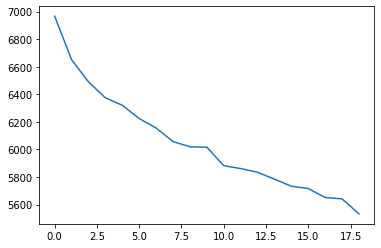

In [ ]:
cost = []
K=list(range(1,20))
for num_clusters in K:
    km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
    km.fit_predict(narray)
    cost.append(km.cost_)

print(cost)
plt.plot(cost)

In [ ]:
import math
def calc_distance (x1,y1, a,b,c):
  d = abs(a*x1+b*y1+c)/(math.sqrt(a*a+b*b))
  return d

In [ ]:
a = cost[0]-cost[-1]
b = K[-1] - K[0]
c1 = K[0] * cost[-1]
c2 = K[-1] * cost[0]
c = c1-c2

In [ ]:
distance_of_points_from_line = []
for k in range(len(K)):
  distance_each_point = calc_distance(K[k], cost[k],a,b,c)
  distance_of_points_from_line.append(distance_each_point)

[0.0, 2.95374220835748, 3.9745822916991584, 4.430613312536219, 4.108462958366919, 4.313467729201928, 4.179587062534168, 4.409694458369382, 3.88672310419844, 2.924455812523907, 3.606410458362815, 2.870066791690129, 2.2090310000180584, 1.836675395848348, 1.47687110417874, 0.6903221875056432, 0.5062362708374717, 0.36817183333634307, 0.0]


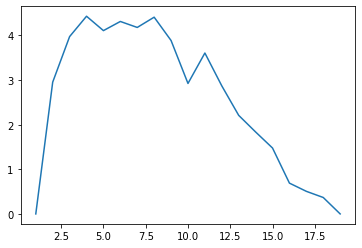

In [ ]:
plt.plot(K, distance_of_points_from_line)
print(distance_of_points_from_line)

In [ ]:
opt_Cost = max(distance_of_points_from_line)
opt_Ind = distance_of_points_from_line.index(opt_Cost)

**- Clustering by using the optimal number of K**

In [ ]:
km = KModes(n_clusters= K[opt_Ind], init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(narray)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 40, cost: 6444.0
Run 1, iteration: 2/100, moves: 15, cost: 6428.0
Run 1, iteration: 3/100, moves: 6, cost: 6425.0
Run 1, iteration: 4/100, moves: 1, cost: 6424.0
Run 1, iteration: 5/100, moves: 0, cost: 6424.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 35, cost: 6465.0
Run 2, iteration: 2/100, moves: 16, cost: 6446.0
Run 2, iteration: 3/100, moves: 15, cost: 6421.0
Run 2, iteration: 4/100, moves: 10, cost: 6409.0
Run 2, iteration: 5/100, moves: 4, cost: 6408.0
Run 2, iteration: 6/100, moves: 0, cost: 6408.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 46, cost: 6444.0
Run 3, iteration: 2/100, moves: 14, cost: 6427.0
Run 3, iteration: 3/100, moves: 2, cost: 6426.0
Run 3, iteration: 4/100, moves: 0, cost: 6426.0
Init: initializing centroids
Ini

**Determining Clusters's Centroids**

In [ ]:
print(km.cluster_centroids_)

[['5.0' '5.0' '5.0' '5.0' '5.0' '0.122' '0.2175' '0.097' '0.1535' '0.154'
  '0.505924523' '0.169985518' '0.240675479' '0.00720668' '0.065570749'
  '0.010636988' '0.6088' 'Right' 'Student Loan'
  'Not really, only some assets I would prefer to own.' 'Another benefit'
  'Every day' '2 to 3 hours' 'Every Day' '3 hours or more'
  '3 hours or more' 'Less then 1 hour' 'Monthly' 'Once a Week'
  'Every Year' 'Education' "I don't have a car" 'Germany' '3 - 4 persons'
  'Maybe, it depends if nothing betters comes up' 'Laptop'
  "I don't drive or have a car"
  'F, I  watch for content and stay informed, but do not become as involved as the above'
  'Healthcare Insurance' 'Yoga' 'Gaming' 'Unemployed' '37329' '5.0'
  "Some college (no degree) Associate's degree" 'Less then 20.000 EUR'
  'Single' 'Germany' 'Prolific Participant' 'English, German'
  'Education & Training'
  'AirBnB, Walt Disney, Duracell, Virgin, Red Bull, Nike' 'None'
  'Clothing & Shoes, Electronics & Computers, Video games'
  'Ins

**Adding Clusters into the Dataset**

In [ ]:
cluster_dict =[]
for c in clusters:
  cluster_dict.append(c)

In [ ]:
cluster_dict

[2,
 1,
 1,
 1,
 0,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 0,
 2,
 3,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 3,
 1,
 0,
 0,
 3,
 0,
 3,
 1,
 0,
 3,
 0,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 0,
 3,
 3,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 3,
 0,
 0,
 1,
 3,
 3,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 3,
 3,
 0,
 0,
 2,
 3,
 3,
 3,
 1,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 3,
 0,
 3,
 3,
 1,
 0,
 1,
 2,
 3,
 1,
 0,
 0,
 3,
 0,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 0,
 0,
 1,
 2,
 1,
 3,
 1,
 0,
 1,
 0,
 3,
 1,
 3,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 2]

In [ ]:
df['clusters']=cluster_dict

In [ ]:
df

,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question21,question22,question23,question24,question25,question26,question27,question28,question29,question30,question31,question32,question34,question35,question36,question37,question38,question39,question40,question41,Latitude,Longitude,topics,Preferred_archetype,clusters
0,0,1,0,0,1,0.147083,0.211042,0.168833,0.150292,0.187042,0.044171,0.020499,0.875858,0.003289,0.047788,0.008394,0.6721,Right,Student Loan,"Not at all, i’d rather rent all assets.",Another benefit,Yearly a few times,Less then 1 hour,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Every two weeks,Two to Three Times a Week,Every Year,Banking & Financial Services,I don't have a car,Netherlands,3 - 4 persons,"Maybe, it depends if nothing betters comes up",Desktop,I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Hockey,Hiking,Unemployed,36423,Female,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,Prolific Participant,"English, Dutch, German",Operations,"AirBnB, Walt Disney, Duracell, Virgin, Red Bul...",None,"Books, Clothing & Shoes, Health & Beauty","Instagram, Youtube, Whatsapp","Print (Newspapers & Periodicals), Radio (AM/FM...",52.32460,5.119300,"['low', 'origin', 'film', 'paddy', 'seinfuckin...",Leave legacy,2
1,2248,122,457,3,1246,0.129500,0.221500,0.143000,0.189500,0.182500,0.035848,0.001670,0.780312,0.001635,0.025637,0.154898,0.9586,Right,Student Loan,"Yes, but in some cases I would consider rental...",A paid job,Every day,1 to 2 hours,Once a Week,3 hours or more,3 hours or more,Less then 1 hour,Monthly,Once a Week,Every Few Years,"Retail, Wholesale & Distribution",I don't have a car,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Desktop,I don't drive or have a car,"C, I respond to the content available online,...","Healthcare Insurance, Home Owners Insurance, R...",Swimming,Swimming,Employed part time (1-34 hours per week),34454,Male,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,Prolific Participant,"English, Dutch","Marketing, Sales & Business Development","Unicef, Lego, Volvo, IBM, Apple, Porsche","Savings Account, Stock Options","Electronics & Computers, Handmade Products, Sp...","Facebook, Instagram, Twitter","Online News (News Websites, News Apps), Print ...",52.01170,4.359700,"['water', 'sleep', 'solo', 'bah', 'steam', 'fi...",Provide structure,1
2,1834,43,276,0,327,0.113000,0.211500,0.068000,0.126500,0.142000,0.457770,0.130685,0.336976,0.007447,0.054606,0.012515,0.7403,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,Every day,1 to 2 hours,Two to Three Times a Week,3 hours or more,3 hours or more,1 to 2 hours,Three days a week,Two to Three Times a Week,Every Year,Software & IT Services,I don't have a car,India,3 - 4 persons,"No, not necessarily, i don't feel that committ...",Smartphone or Tablet,I don't drive or have a car,"D, I am eager for information and absorb artic...",Life Insurance,Soccer,Cooking,Independent part time (1-34 hours per week),36758,Male,Some college (no degree) Associate's degree,Less then 20.000 EUR,Single,India,Odema Community Member,"English, German",Information Technology,"Unicef, Lego, Volvo, IBM, Apple, Porsche",Mutual Funds,"Books, Clothing & Shoes, Electronics & Compute...","Instagram, Twitter, Linkedin, Youtube, Whatsapp","Online News (News Websites, News Apps), Podcas...",13.22570,77.661150,"['police', 'nigeria', 'european', 'shoot', 'ou...",Provide structure,1
3,0,2,0,0,7,0.152750,0.250750,0.101250,0.146250,0.166500,0.187408,0.067470,0.671730,0.007165,0.053518,0.012708,0.6229,Right,Auto Loans,"Not at all, 